# Machine Learning: Energy Load Prediction

This is my first machine learning project. Here I am using real data provided by my data scientist friend. This data contains hourly energy consumption recorded from 2014 to 2017.

First import necessary libraries for this analysis:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Now load input data and do some Exploratory Data Analysis:

In [3]:
load = pd.read_csv('Load_example.csv')

Check shape of data shape. It has 31487 rows and 13 columns

In [4]:
load.shape

(31487, 13)

Head of this data set looks like following

In [5]:
load.head()

,Date,YEAR,Month,Day,hour,temperature,dewpoint,humidity,wind_speed,precipitation,cloud_cover,Hourly_Block,Load
0,1/5/2014,2014.0,1.0,5.0,0.0,21.0,8.0,57.0,20.9,0.0,35.0,0.0,4267.0
1,1/5/2014,2014.0,1.0,5.0,1.0,21.0,9.0,60.0,20.9,0.0,35.0,0.0,3998.0
2,1/5/2014,2014.0,1.0,5.0,2.0,21.0,9.0,60.0,16.2,0.0,0.0,0.0,3881.0
3,1/5/2014,2014.0,1.0,5.0,3.0,19.0,9.0,65.0,12.8,0.0,35.0,0.0,3864.0
4,1/5/2014,2014.0,1.0,5.0,4.0,18.0,9.0,68.0,11.6,0.0,25.0,0.0,3898.0


Though I am not going to do timeseries analysis but I want to change Date format and set Date as index column.

In [6]:
#change date format
load['Date']=pd.to_datetime(load['Date'])
load.set_index('Date')

,YEAR,Month,Day,hour,temperature,dewpoint,humidity,wind_speed,precipitation,cloud_cover,Hourly_Block,Load
Date,,,,,,,,,,,,
2014-01-05,2014.0,1.0,5.0,0.0,21.0,8.0,57.0,20.9,0.00,35.0,0.0,4267.0
2014-01-05,2014.0,1.0,5.0,1.0,21.0,9.0,60.0,20.9,0.00,35.0,0.0,3998.0
2014-01-05,2014.0,1.0,5.0,2.0,21.0,9.0,60.0,16.2,0.00,0.0,0.0,3881.0
2014-01-05,2014.0,1.0,5.0,3.0,19.0,9.0,65.0,12.8,0.00,35.0,0.0,3864.0
2014-01-05,2014.0,1.0,5.0,4.0,18.0,9.0,68.0,11.6,0.00,25.0,0.0,3898.0
2014-01-05,2014.0,1.0,5.0,5.0,17.0,10.0,74.0,12.8,0.00,35.0,0.0,4116.0
2014-01-05,2014.0,1.0,5.0,6.0,19.0,10.0,68.0,13.9,0.00,0.0,0.0,4368.0
2014-01-05,2014.0,1.0,5.0,7.0,19.0,11.0,71.0,11.6,0.00,35.0,0.0,4603.0
2014-01-05,2014.0,1.0,5.0,8.0,21.0,11.0,65.0,12.8,0.00,0.0,0.0,4822.0


In [7]:
load.head()

,Date,YEAR,Month,Day,hour,temperature,dewpoint,humidity,wind_speed,precipitation,cloud_cover,Hourly_Block,Load
0,2014-01-05,2014.0,1.0,5.0,0.0,21.0,8.0,57.0,20.9,0.0,35.0,0.0,4267.0
1,2014-01-05,2014.0,1.0,5.0,1.0,21.0,9.0,60.0,20.9,0.0,35.0,0.0,3998.0
2,2014-01-05,2014.0,1.0,5.0,2.0,21.0,9.0,60.0,16.2,0.0,0.0,0.0,3881.0
3,2014-01-05,2014.0,1.0,5.0,3.0,19.0,9.0,65.0,12.8,0.0,35.0,0.0,3864.0
4,2014-01-05,2014.0,1.0,5.0,4.0,18.0,9.0,68.0,11.6,0.0,25.0,0.0,3898.0


Following plot of load shows there is one zero value recorded

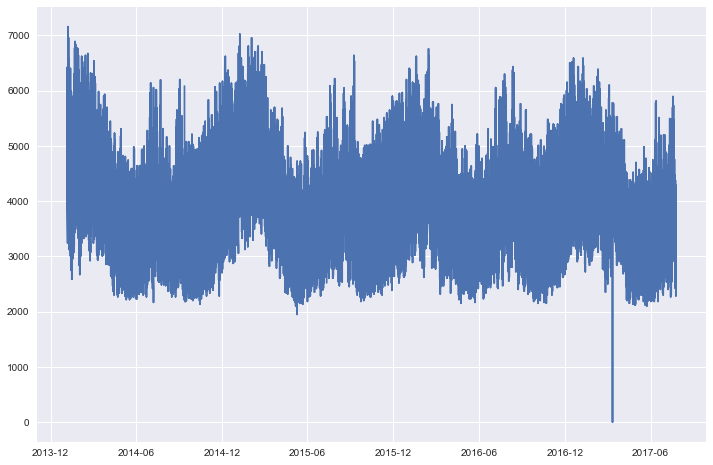

In [8]:
plt.figure(figsize=(12,8))
plt.plot(load['Date'],load['Load'])

In [9]:
load[0:5]['temperature']

0    21.0
1    21.0
2    21.0
3    19.0
4    18.0
Name: temperature, dtype: float64

In [10]:
load.iloc[:,5:13].head()

,temperature,dewpoint,humidity,wind_speed,precipitation,cloud_cover,Hourly_Block,Load
0,21.0,8.0,57.0,20.9,0.0,35.0,0.0,4267.0
1,21.0,9.0,60.0,20.9,0.0,35.0,0.0,3998.0
2,21.0,9.0,60.0,16.2,0.0,0.0,0.0,3881.0
3,19.0,9.0,65.0,12.8,0.0,35.0,0.0,3864.0
4,18.0,9.0,68.0,11.6,0.0,25.0,0.0,3898.0


In [11]:
load.iloc[:,0:6].head()

,Date,YEAR,Month,Day,hour,temperature
0,2014-01-05,2014.0,1.0,5.0,0.0,21.0
1,2014-01-05,2014.0,1.0,5.0,1.0,21.0
2,2014-01-05,2014.0,1.0,5.0,2.0,21.0
3,2014-01-05,2014.0,1.0,5.0,3.0,19.0
4,2014-01-05,2014.0,1.0,5.0,4.0,18.0


In [12]:
# Check NaN values and remove
load.isnull().sum()

Date             336
YEAR             336
Month            336
Day              336
hour             336
temperature      498
dewpoint         498
humidity         498
wind_speed       498
precipitation    498
cloud_cover      498
Hourly_Block     336
Load             347
dtype: int64

In [13]:
load_final=load.dropna()

In [14]:
load_final.isnull().sum()

Date             0
YEAR             0
Month            0
Day              0
hour             0
temperature      0
dewpoint         0
humidity         0
wind_speed       0
precipitation    0
cloud_cover      0
Hourly_Block     0
Load             0
dtype: int64

In [15]:
load_final.shape

(30978, 13)

In [16]:
# There is one zero in Load column replace it by forward fill method
load_final.loc[load_final['Load']==0]

,Date,YEAR,Month,Day,hour,temperature,dewpoint,humidity,wind_speed,precipitation,cloud_cover,Hourly_Block,Load
27890,2017-03-12,2017.0,3.0,12.0,2.0,8.0,-8.0,48.0,18.4,0.0,0.0,0.0,0.0


In [17]:
load_final['Load'].replace(to_replace=0,method='ffill',inplace=True)

In [18]:
# Now load_final is the data set without missing values. I will use this data for our model
load_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30978 entries, 0 to 31150
Data columns (total 13 columns):
Date             30978 non-null datetime64[ns]
YEAR             30978 non-null float64
Month            30978 non-null float64
Day              30978 non-null float64
hour             30978 non-null float64
temperature      30978 non-null float64
dewpoint         30978 non-null float64
humidity         30978 non-null float64
wind_speed       30978 non-null float64
precipitation    30978 non-null float64
cloud_cover      30978 non-null float64
Hourly_Block     30978 non-null float64
Load             30978 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 3.3 MB


In [91]:
load_final.describe()

,YEAR,Month,Day,hour,temperature,dewpoint,humidity,wind_speed,precipitation,cloud_cover,Hourly_Block,Load
count,30978.000000,30978.000000,30978.000000,30978.000000,30978.000000,30978.000000,30978.000000,30978.000000,30978.000000,30978.000000,30978.000000,30978.000000
mean,2015.325231,6.116470,15.673478,11.492414,48.317696,36.152376,65.926303,10.244512,0.005386,52.715088,0.466234,4043.111369
std,1.044516,3.379829,8.753441,6.924411,19.218952,19.978373,20.245551,5.102604,0.035266,42.813379,0.498867,901.559200
min,2014.000000,1.000000,1.000000,0.000000,-14.100000,-27.800000,8.000000,0.000000,0.000000,0.000000,0.000000,1949.000000
25%,2014.000000,3.000000,8.000000,5.000000,33.100000,22.000000,50.000000,6.900000,0.000000,0.000000,0.000000,3410.000000
50%,2015.000000,6.000000,16.000000,11.000000,49.000000,38.000000,66.000000,9.300000,0.000000,60.000000,0.000000,4066.000000
75%,2016.000000,9.000000,23.000000,17.000000,64.000000,53.000000,84.000000,12.800000,0.000000,100.000000,1.000000,4647.000000
max,2017.000000,12.000000,31.000000,23.000000,91.900000,74.000000,100.000000,40.300000,1.820000,100.000000,1.000000,7157.000000


# Now I want to show how average load changes with year,       month, and hour

In [20]:
byYear_load = load_final.groupby('YEAR').Load.mean()
byYear_load

YEAR
2014.0    4054.802010
2015.0    4092.484429
2016.0    4038.141910
2017.0    3944.428080
Name: Load, dtype: float64

In [21]:
byYear_summary=load_final.groupby('YEAR').Load.agg(['min', 'max','mean'])
byYear_summary

,min,max,mean
YEAR,,,
2014.0,2134.0,7157.0,4054.802010
2015.0,1949.0,7022.0,4092.484429
2016.0,2150.0,6754.0,4038.141910
2017.0,2100.0,6586.0,3944.428080


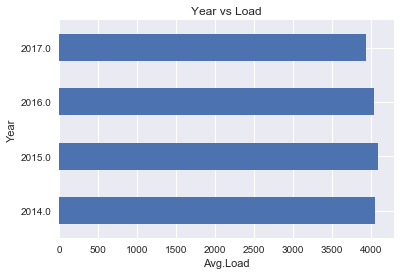

In [22]:
load_final.groupby('YEAR').Load.mean().plot(kind='barh')
plt.xlabel('Avg.Load')
plt.ylabel('Year')
plt.title('Year vs Load')

In [23]:
byMonth_load = load_final.groupby('Month').Load.mean()
byMonth_load

Month
1.0     4644.637955
2.0     4604.090708
3.0     4248.146851
4.0     3692.628151
5.0     3548.037298
6.0     3720.785764
7.0     4167.156814
8.0     4020.467742
9.0     3813.016815
10.0    3669.614695
11.0    3948.121255
12.0    4398.614754
Name: Load, dtype: float64

In [24]:
byMonth_summary=load_final.groupby('Month').Load.agg(['min','max','mean'])
byMonth_summary

,min,max,mean
Month,,,
1.0,2587.0,7157.0,4644.637955
2.0,2352.0,6955.0,4604.090708
3.0,2318.0,6535.0,4248.146851
4.0,2117.0,5746.0,3692.628151
5.0,1949.0,5240.0,3548.037298
6.0,2184.0,5810.0,3720.785764
7.0,2167.0,6295.0,4167.156814
8.0,2268.0,6433.0,4020.467742
9.0,2184.0,6636.0,3813.016815


Visualization of average load by month in three years.

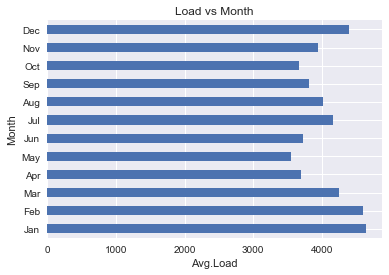

In [25]:
load_final.groupby('Month').Load.mean().plot(kind='barh')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Avg.Load')
plt.ylabel('Month')
plt.title('Load vs Month')

In [26]:
byHour_load = load_final.groupby('hour').Load.mean()
byHour_load

hour
0.0     3122.010039
1.0     2935.902703
2.0     2839.643963
3.0     2818.476006
4.0     2925.002318
5.0     3252.249421
6.0     3826.562016
7.0     4157.794574
8.0     4307.277519
9.0     4388.852713
10.0    4415.297130
11.0    4425.141085
12.0    4399.845736
13.0    4332.600000
14.0    4288.000775
15.0    4314.667442
16.0    4569.361240
17.0    4921.594259
18.0    5049.955780
19.0    5033.457719
20.0    4863.853375
21.0    4481.233333
22.0    3943.224031
23.0    3443.982171
Name: Load, dtype: float64

In [27]:
byHour_summary=load_final.groupby('hour').Load.agg(['min','max','mean'])
byHour_summary

,min,max,mean
hour,,,
0.0,2302.0,4771.0,3122.010039
1.0,2150.0,4536.0,2935.902703
2.0,2134.0,4502.0,2839.643963
3.0,2100.0,4519.0,2818.476006
4.0,2117.0,4586.0,2925.002318
5.0,2218.0,4889.0,3252.249421
6.0,2463.0,5762.0,3826.562016
7.0,2789.0,5964.0,4157.794574
8.0,2688.0,6167.0,4307.277519


Average load by hour

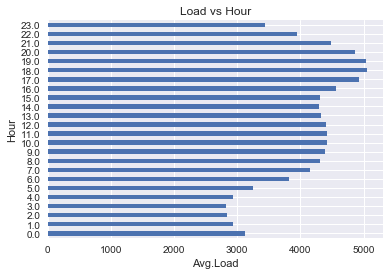

In [28]:
load_final.groupby('hour').Load.mean().plot(kind='barh')
plt.xlabel('Avg.Load')
plt.ylabel('Hour')
plt.title('Load vs Hour')

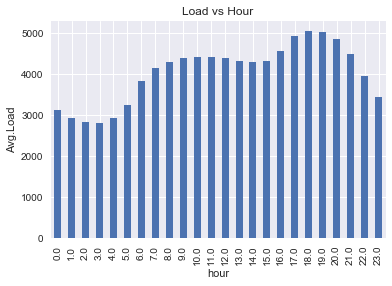

In [29]:
load_final.groupby('hour').Load.mean().plot(kind='bar')
plt.ylabel('Avg.Load')
plt.title('Load vs Hour')

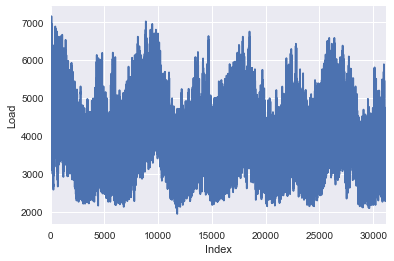

In [30]:
load_final.Load.plot()
plt.xlabel('Index')
plt.ylabel('Load')

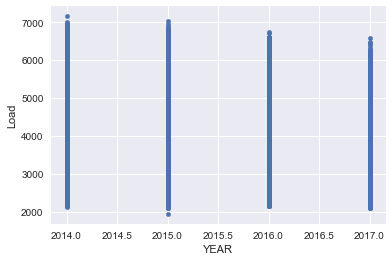

In [31]:
load_final.plot(x='YEAR',y='Load',kind='scatter')

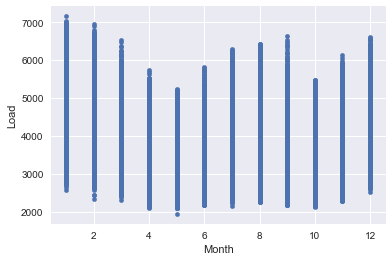

In [32]:
load_final.plot(x ='Month', y='Load',kind='scatter')

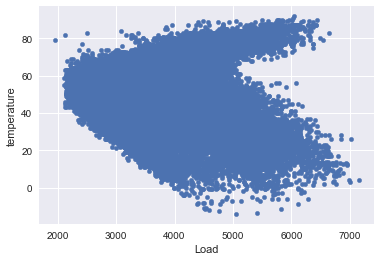

In [33]:
load_final.plot(x ='Load', y='temperature',kind='scatter')

# Machine learning: RandomForest Method 

In [34]:
#from sklearn.preprocessing import StandardScaler

In [35]:
#scaler = StandardScaler()

In [36]:
#scaler.fit(load_final.drop(['Date','YEAR','Month','Day','hour'], axis=1))

In [37]:
#scaled_feature = scaler.transform(load_final.drop(['Date','YEAR','Month','Day','hour'], axis=1))

In RandomForest method I do not need to change 'hour' categorical feature to dummy variable but I do here. It must be done if we use neural network method.

In [38]:
categorical_feature = ['hour']

In [39]:
#categorical_feature = load_final[['Day','hour']]

In [40]:
load_final_1=pd.get_dummies(load_final,columns=categorical_feature,drop_first=True)

In [41]:
load_final_1.head()

,Date,YEAR,Month,Day,temperature,dewpoint,humidity,wind_speed,precipitation,cloud_cover,...,hour_14.0,hour_15.0,hour_16.0,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0
0,2014-01-05,2014.0,1.0,5.0,21.0,8.0,57.0,20.9,0.0,35.0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-05,2014.0,1.0,5.0,21.0,9.0,60.0,20.9,0.0,35.0,...,0,0,0,0,0,0,0,0,0,0
2,2014-01-05,2014.0,1.0,5.0,21.0,9.0,60.0,16.2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2014-01-05,2014.0,1.0,5.0,19.0,9.0,65.0,12.8,0.0,35.0,...,0,0,0,0,0,0,0,0,0,0
4,2014-01-05,2014.0,1.0,5.0,18.0,9.0,68.0,11.6,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
load_final_1.columns

Index(['Date', 'YEAR', 'Month', 'Day', 'temperature', 'dewpoint', 'humidity',
       'wind_speed', 'precipitation', 'cloud_cover', 'Hourly_Block', 'Load',
       'hour_1.0', 'hour_2.0', 'hour_3.0', 'hour_4.0', 'hour_5.0', 'hour_6.0',
       'hour_7.0', 'hour_8.0', 'hour_9.0', 'hour_10.0', 'hour_11.0',
       'hour_12.0', 'hour_13.0', 'hour_14.0', 'hour_15.0', 'hour_16.0',
       'hour_17.0', 'hour_18.0', 'hour_19.0', 'hour_20.0', 'hour_21.0',
       'hour_22.0', 'hour_23.0'],
      dtype='object')

In [43]:
data_1 = load_final_1[load_final_1.YEAR!=2017]
data_2 = load_final_1[load_final_1.YEAR==2017]

In [44]:
#from sklearn.model_selection import train_test_split

In [45]:
X_train = data_1.drop(['Date', 'YEAR', 'Month','Day','Load'], axis=1)
X_test = data_2.drop(['Date', 'YEAR', 'Month','Day','Load'], axis=1)
y_train = data_1['Load']
y_test = data_2['Load']

In [46]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
#from sklearn.preprocessing import StandardScaler

In [48]:
#sc = StandardScaler()

In [49]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [50]:
X_test

,temperature,dewpoint,humidity,wind_speed,precipitation,cloud_cover,Hourly_Block,hour_1.0,hour_2.0,hour_3.0,...,hour_14.0,hour_15.0,hour_16.0,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0
26208,33.0,31.0,92.0,15.0,0.02,100.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26209,32.0,30.0,92.0,15.0,0.04,100.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26210,32.0,30.0,92.0,15.0,0.03,100.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26211,32.0,30.0,92.0,19.6,0.00,100.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26212,32.0,30.0,92.0,12.7,0.00,100.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26213,32.0,29.0,89.0,13.8,0.00,100.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26214,32.0,28.0,85.0,11.5,0.00,75.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26215,32.0,23.0,69.0,11.4,0.00,80.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26216,32.2,22.3,67.0,12.8,0.00,72.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26217,32.0,28.0,85.0,10.4,0.00,35.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
regressor = RandomForestRegressor(n_estimators=1000)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [80]:
predictions = regressor.predict(X_test)

In [81]:
predictions

array([ 3406.387,  3153.307,  3013.919, ...,  3999.716,  3461.564,
        2960.594])

In [82]:
from sklearn import metrics

In [83]:
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

317.632920347


In [84]:
print(metrics.r2_score(y_test,predictions))

0.863430618797


In [85]:
test_index = y_test.reset_index()
test_index.shape

(4943, 2)

In [86]:
y_test

26208    3595.0
26209    3410.0
26210    3242.0
26211    3158.0
26212    3158.0
26213    3226.0
26214    3394.0
26215    3646.0
26216    3982.0
26217    4267.0
26218    4370.0
26219    4428.0
26220    4522.0
26221    4409.0
26222    4430.0
26223    4536.0
26224    4922.0
26225    5527.0
26226    5494.0
26227    5208.0
26228    5040.0
26229    4586.0
26230    4133.0
26231    3696.0
26232    3461.0
26233    3360.0
26234    3192.0
26235    3259.0
26236    3326.0
26237    3595.0
          ...  
31121    4341.0
31122    4095.0
31123    4032.0
31124    3713.0
31125    3259.0
31126    2806.0
31127    2470.0
31128    2335.0
31129    2285.0
31130    2335.0
31131    2436.0
31132    2688.0
31133    3163.0
31134    3481.0
31135    3659.0
31136    3818.0
31137    3876.0
31138    3985.0
31139    3947.0
31140    3913.0
31141    3902.0
31142    3731.0
31143    3928.0
31144    4284.0
31145    4263.0
31146    4047.0
31147    3914.0
31148    3746.0
31149    3142.0
31150    2688.0
Name: Load, Length: 4943

Predicted values and test values side by side

In [87]:
# Be careful order of dictonary has no effect in output. For this need to import OrderDict module
result=pd.DataFrame({'Pred':predictions,'Test':y_test})

In [88]:
result

,Pred,Test
26208,3406.387000,3595.0
26209,3153.307000,3410.0
26210,3013.919000,3242.0
26211,3063.960000,3158.0
26212,3166.539917,3158.0
26213,3526.360000,3226.0
26214,3964.606000,3394.0
26215,3868.236000,3646.0
26216,4164.723000,3982.0
26217,4790.213000,4267.0


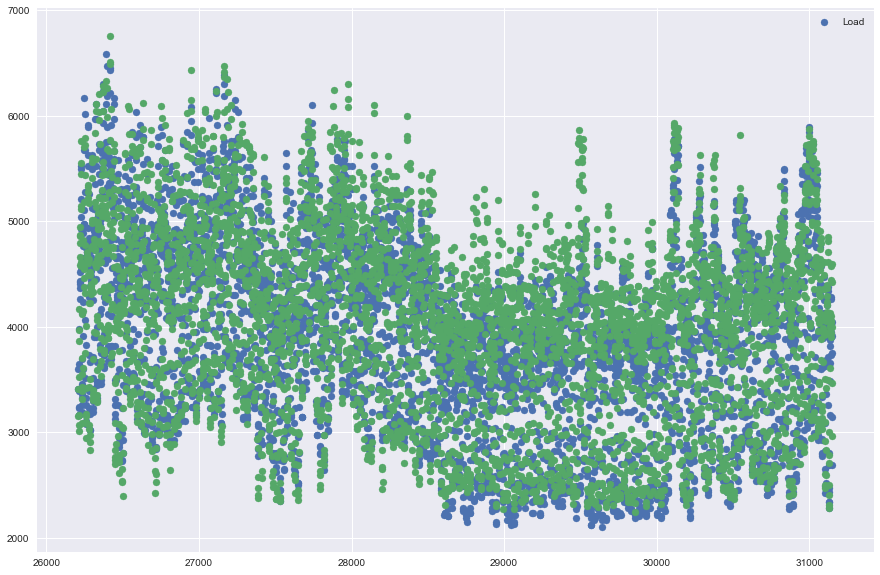

In [89]:
plt.figure(figsize=(15,10))
plt.scatter(test_index['index'],test_index['Load'])
plt.scatter(test_index['index'],predictions)
plt.legend()

([<matplotlib.axis.YTick at 0x1adcd4be0>,
 <a list of 30 Text yticklabel objects>)

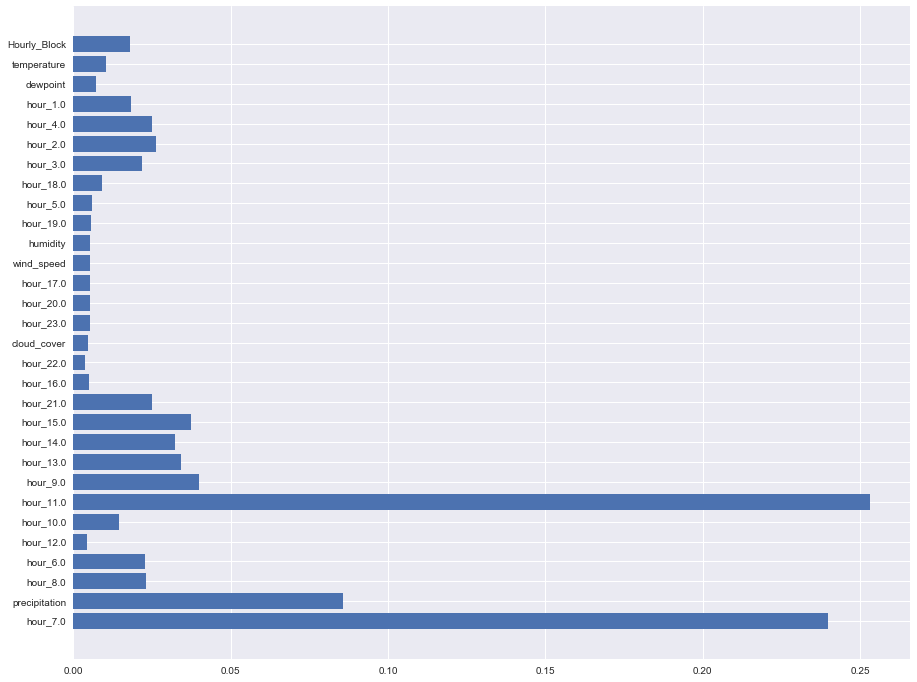

In [90]:
plt.figure(figsize=(15,12))
imp_feature = regressor.feature_importances_
names = X_train.columns
imp,names = zip(*sorted(zip(imp_feature,names)))
plt.barh(range(len(names)),imp_feature, align='center')
plt.yticks(range(len(names)),names)

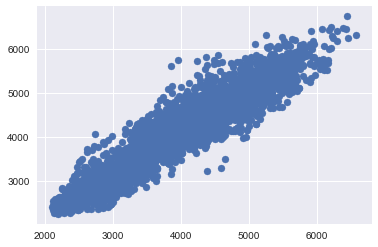

In [78]:
plt.scatter(y_test,predictions)